<a href="https://colab.research.google.com/github/pingping-0606/Python_dataviz2024/blob/main/Hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#ดึงข้อมูล

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: เรียงลำดับตามปี

df.sort_values(by=['Year'],ascending=False)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
13443,State vs Justice,(2022),120 min,"Biography, Crime, Drama",NaN,NaN,Jaimin Bal,NaN,NaN,NaN
2221,Bhediya,(2022),NaN,"Comedy, Horror",NaN,NaN,Amar Kaushik,Kriti Sanon,Varun Dhawan,Abhishek Banerjee
1557,Bachchan Pandey,(2022),NaN,Action,NaN,NaN,Farhad Samji,Akshay Kumar,Jacqueline Fernandez,Kriti Sanon
2699,Chaalbaaz in London,(2022),NaN,Comedy,NaN,NaN,Pankaj Parashar,Shraddha Kapoor,NaN,NaN
4692,Fighter,(2022),NaN,"Action, Thriller",NaN,NaN,Siddharth Anand,Deepika Padukone,Hrithik Roshan,Birol Tarkan Yildiz
...,...,...,...,...,...,...,...,...,...,...
15177,Yakshya,NaN,NaN,Horror,NaN,NaN,Linkan Mahapatra,NaN,NaN,NaN
15315,Yubi Lakpi,NaN,NaN,Biography,NaN,NaN,NaN,NaN,NaN,NaN
15316,Yubi Lukpi,NaN,NaN,Drama,NaN,NaN,Omung Kumar,NaN,NaN,NaN
15337,Zahoor,NaN,NaN,Action,NaN,NaN,Pankaj Batra,Parineeti Chopra,Parmish Verma,Rahul Sharma


In [ ]:
df['Year'].value_counts().sort_index().max()

410

In [ ]:
# prompt: หาค่าเรทเฉลี่ยของหนังแต่ละประเภทในแต่ทุกๆ 10 ปี ปีไหนเป็นค่าว่างให้ลบออก

import numpy as np

df = df.dropna(subset=['Year'])
# Remove any parentheses and then convert to integers
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '').astype(int)

def get_decade(year):
  return str(year // 10 * 10) + 's'

df['Decade'] = df['Year'].apply(get_decade)

def get_avg_rating(genre_str):
  if isinstance(genre_str, str):
    genres = genre_str.split(', ')
    ratings = []
    for genre in genres:
      rating = df[df['Genre'].str.contains(genre, na=False)]['Rating'].mean()
      if not np.isnan(rating):
        ratings.append(rating)
    if ratings:
      return np.mean(ratings)
  return np.nan

decade_genre_ratings = df.groupby('Decade')['Genre'].apply(get_avg_rating)
print(decade_genre_ratings)

Decade
1910s   NaN
1920s   NaN
1930s   NaN
1940s   NaN
1950s   NaN
1960s   NaN
1970s   NaN
1980s   NaN
1990s   NaN
2000s   NaN
2010s   NaN
2020s   NaN
Name: Genre, dtype: float64


<ipython-input-38-a62ed400fffc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '').astype(int)
<ipython-input-38-a62ed400fffc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = df['Year'].apply(get_decade)


#Graph 1 แสดงค่าเฉลี่ยของเรทติ้งทุกๆ 4 ปี ของหนัง ดราม่า และแอคชั่น

In [ ]:
ndf=df.dropna(subset=['Year'])

In [ ]:
# prompt: จัดกลุ่ม 10 ปี หาค่าเฉลี่ยของเรทในแต่ละ genres

import numpy as np
def get_avg_rating(genre_str):
  if isinstance(genre_str, str):
    genres = genre_str.split(', ')
    ratings = []
    for genre in genres:
      rating = ndf[ndf['Genre'].str.contains(genre, na=False)]['Rating'].mean()
      if not np.isnan(rating):
        ratings.append(rating)
    if ratings:
      return np.mean(ratings)
  return np.nan

decade_genre_ratings = ndf.groupby('Decade')['Genre'].apply(get_avg_rating)
print(decade_genre_ratings)


Decade
1910s   NaN
1920s   NaN
1930s   NaN
1940s   NaN
1950s   NaN
1960s   NaN
1970s   NaN
1980s   NaN
1990s   NaN
2000s   NaN
2010s   NaN
2020s   NaN
Name: Genre, dtype: float64


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Decade
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2010s
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2020s
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2010s
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,2010s
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1990s
...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1980s
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1990s
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,2000s
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,1980s


In [ ]:
# prompt: ลบค่าว่างในปี

df1 = df.dropna(subset=['Year'])
df1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Decade
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2010s
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2020s
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2010s
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,2010s
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1990s
...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1980s
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1990s
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,2000s
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,1980s


In [ ]:
# prompt: จัดกลุ่มข้อมูลของปีโดยมีความกว้างของปีเท่ากับ4ปี และหาค่าเฉลี่ยของเรทติ้งหนังดราม่าในช่วงเวลา 4 ปีนั้น ต่อด้วยสร้าง sterplot

import matplotlib.pyplot as plt

# จัดกลุ่มข้อมูลของปีโดยมีความกว้างของปีเท่ากับ 4 ปี
df1['YearGroup'] = (df1['Year'] // 4) * 4


In [ ]:
# หาค่าเฉลี่ยของเรทติ้งหนังดราม่าในช่วงเวลา 4 ปีนั้น
drama_ratings = df1[df1['Genre'].str.contains('Drama', na=False)].groupby('YearGroup')['Rating'].mean()
#หาค่าเฉลี่ยของเรทติ้งหนังแอคชั่นในช่วงเวลา 4 ปี
Action_ratings = df1[df1['Genre'].str.contains('Action', na=False)].groupby('YearGroup')['Rating'].mean()
#หาค่าเฉลี่ยของเรทติ้งหนัง Romance ในช่วงเวลา 4 ปี
#Romance_ratings = df1[df1['Genre'].str.contains('Romance', na=False)].groupby('YearGroup')['Rating'].mean()
#หาค่าเฉลี่ยของเรทติ้งหนัง Comedy ในช่วงเวลา 4 ปี
#Comedy_ratings = df1[df1['Genre'].str.contains('Comedy', na=False)].groupby('YearGroup')['Rating'].mean()


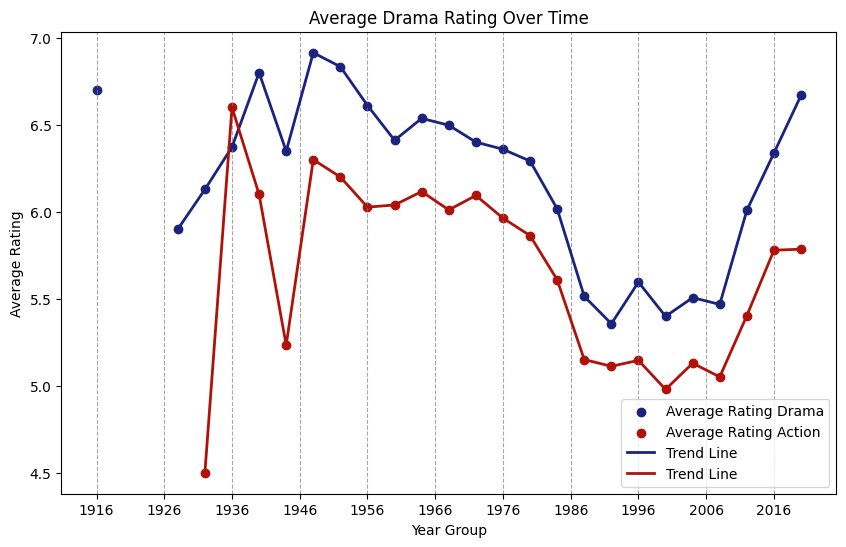

In [ ]:
# สร้าง Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(drama_ratings.index, drama_ratings.values, color='#1a237e', label='Average Rating Drama')
plt.scatter(Action_ratings.index, Action_ratings.values, color='#b0120a', label='Average Rating Action')
#plt.scatter(Romance_ratings.index, Romance_ratings.values, color='green', label='Average Rating Romance')
#plt.scatter(Comedy_ratings.index, Comedy_ratings.values, color='yellow', label='Average Rating Comedy')
# เพิ่มเส้นกริดทุก 10 ปี
plt.xticks(ticks=range(min(drama_ratings.index), max(drama_ratings.index)+1 , 10))  # ตั้งค่า xticks ทุก 10  ปี
plt.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.7)

# เพิ่มกราฟเส้นเพื่อดูเทรน
plt.plot(drama_ratings.index, drama_ratings.values, color='#1a237e', linestyle='-', linewidth=2, label='Trend Line')
plt.plot(Action_ratings.index, Action_ratings.values, color='#b0120a', linestyle='-', linewidth=2, label='Trend Line')
#plt.plot(Romance_ratings.index, Romance_ratings.values, color='green', linestyle='-', linewidth=2, label='Trend Line')
#plt.plot(Comedy_ratings.index, Comedy_ratings.values, color='yellow', linestyle='-', linewidth=2, label='Trend Line')

plt.xlabel('Year Group')
plt.ylabel('Average Rating')
plt.title('Average Drama Rating Over Time')
plt.legend()
plt.show()

#Graph 2 Boxplot แสดงค่าเฉลี่ยของความยาวหนัง ระหว่างหนังดราม่าและหนังแอคชั่น

In [ ]:
df1['Time_movie']=df1['Duration'].str.split(' ').str[0]
df1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Decade,Year_Group,YearGroup,Time_movie
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2010s,2016,2016,109
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2020s,2016,2020,90
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2010s,2016,2016,110
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,2010s,2008,2008,105
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1990s,1992,1996,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1980s,1984,1988,NaN
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1990s,1992,1996,129
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,2000s,2000,2004,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,1980s,1984,1988,NaN


In [ ]:
# Convert 'Time_movie' to numeric (assuming it's in minutes)
df1['Time_movie'] = df1['Time_movie'].str.extract('(\d+)').astype(float)
# หาค่าเฉลี่ยของเรทติ้งหนังดราม่าในช่วงเวลา 4 ปีนั้น
Drama_Duration = df1[df1['Genre'].str.contains('Drama', na=False)].groupby('YearGroup')['Time_movie'].mean()
#หาค่าเฉลี่ยของเรทติ้งหนังแอคชั่นในช่วงเวลา 4 ปี
Action_Duration = df1[df1['Genre'].str.contains('Action', na=False)].groupby('YearGroup')['Time_movie'].mean()

In [ ]:
Drama_Duration

,Time_movie
YearGroup,
1916,NaN
1920,NaN
1928,122.666667
1932,139.923077
1936,145.481481
1940,143.294118
1944,120.954545
1948,143.520000
1952,135.476190


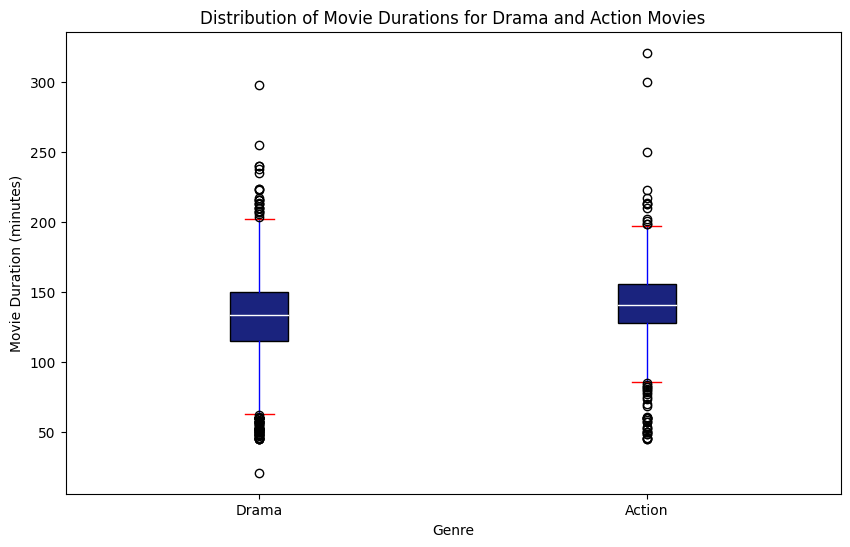

In [ ]:
# prompt: สร้าง boxplot แสดง Time_movie ของหนังทั้งสองไทป์

import matplotlib.pyplot as plt
# Create a list of Time_movie data for each genre
Drama_Time = df1[df1['Genre'].str.contains('Drama', na=False)]['Time_movie'].dropna()
Action_Time = df1[df1['Genre'].str.contains('Action', na=False)]['Time_movie'].dropna()

# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([Drama_Time, Action_Time], labels=['Drama', 'Action'], patch_artist=True,
                      boxprops=dict(facecolor='#1a237e', color='Black'),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='red'),
                      medianprops=dict(color='white'))
plt.xlabel('Genre')
plt.ylabel('Movie Duration (minutes)')
plt.title('Distribution of Movie Durations for Drama and Action Movies')
plt.show()


In [ ]:
boxplot['fliers']

In [ ]:
boxplot['fliers'][0]

In [ ]:
boxplot['fliers'][0].get_ydata()

array([ 45.,  60.,  48.,  49.,  52.,  46.,  57.,  60.,  50.,  48.,  49.,
        60.,  50.,  52.,  46.,  59.,  60.,  51.,  52.,  45.,  57.,  51.,
        58.,  56.,  50.,  52.,  56.,  45.,  48.,  52.,  53.,  52.,  60.,
        57.,  61.,  52.,  51.,  57.,  46.,  60.,  60.,  21.,  49.,  46.,
        50.,  54.,  48.,  60.,  47.,  45.,  55.,  54.,  56.,  60.,  52.,
        57.,  52.,  50.,  60.,  57.,  62., 240., 207., 216., 206., 213.,
       210., 223., 210., 224., 255., 224., 216., 214., 208., 207., 216.,
       238., 213., 210., 204., 235., 298., 217., 240.])

In [ ]:
boxplot['fliers'][1].get_ydata()

array([ 46.,  45.,  49.,  46.,  57.,  77.,  52.,  82.,  54.,  45.,  57.,
        50.,  50.,  50.,  81.,  79.,  60.,  74.,  69.,  53.,  60.,  60.,
        49.,  60.,  82.,  80.,  70.,  59.,  84.,  85.,  61.,  75., 300.,
       201., 321., 199., 213., 199., 223., 210., 202., 214., 213., 217.,
       250.])